In [13]:
from sklearn.datasets import fetch_california_housing 
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
#load California Housing dataset
cal_housing = fetch_california_housing()
# convert the dataset to a Pandas Dataframe
df= pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
df['target'] = cal_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.shape

(20640, 9)

## Data Preprocessing

In [18]:
df.duplicated().sum()

0

In [20]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [ ]:
#Here there is no duplicate values and missing values

### finding Outliers

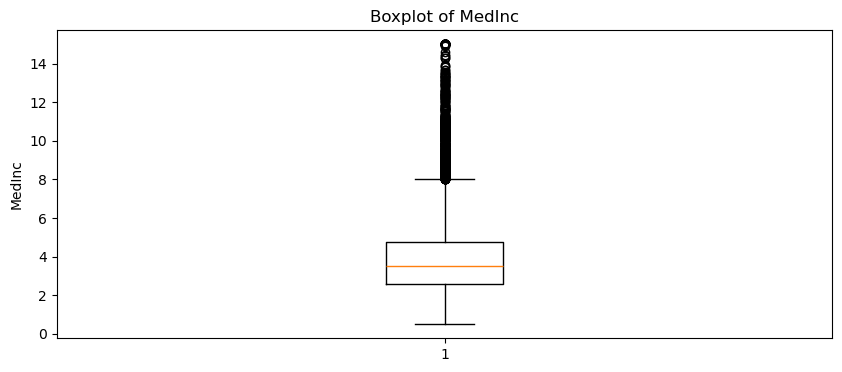

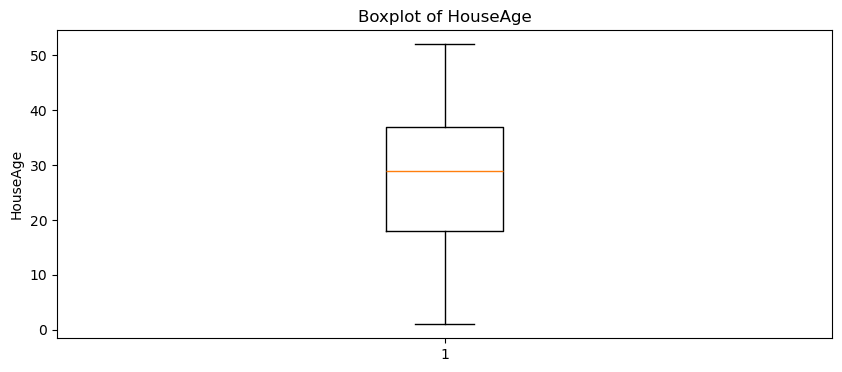

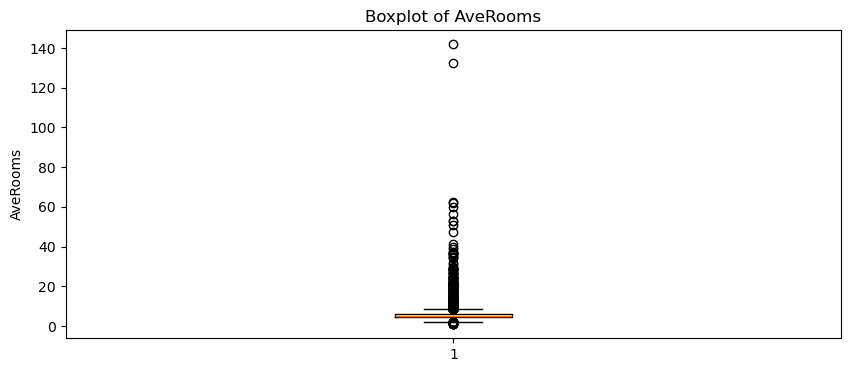

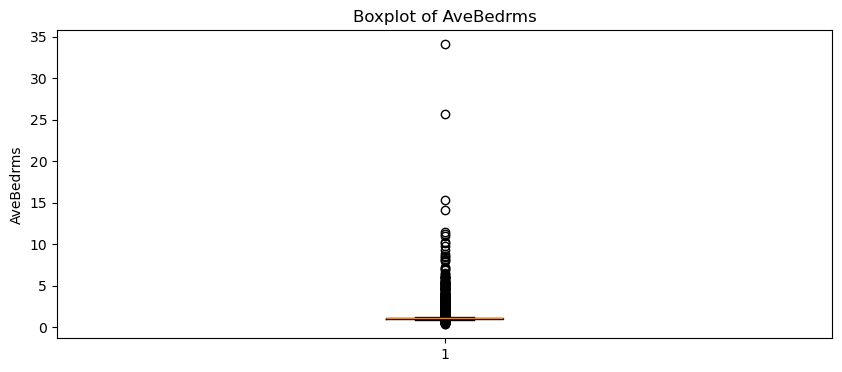

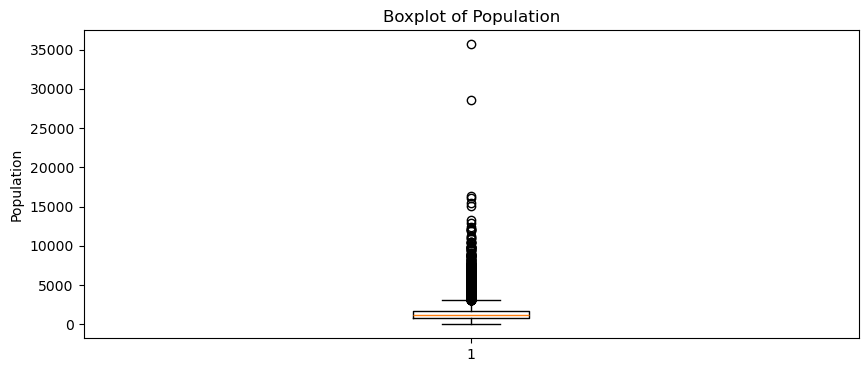

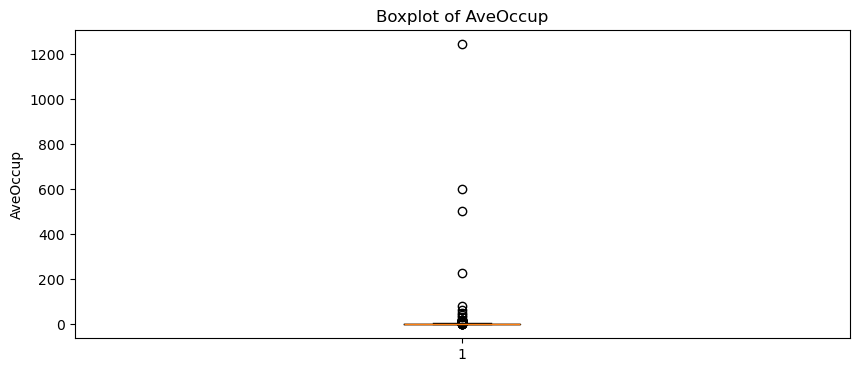

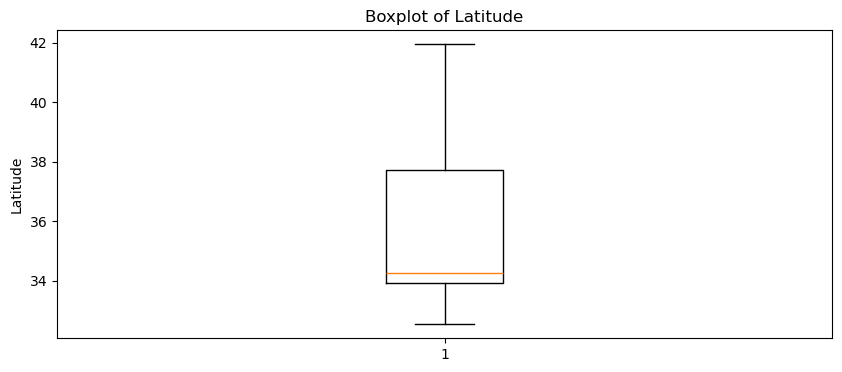

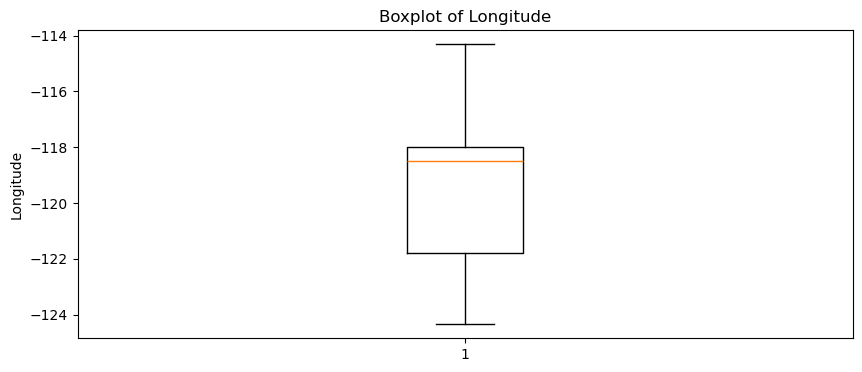

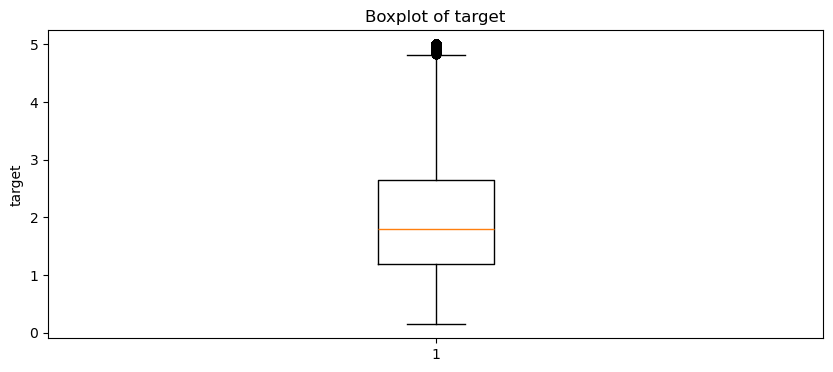

In [17]:
numerical_cols=df.select_dtypes(include=np.number).columns
for column in numerical_cols:
    plt.figure(figsize=(10,4))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

## Handling Outliers

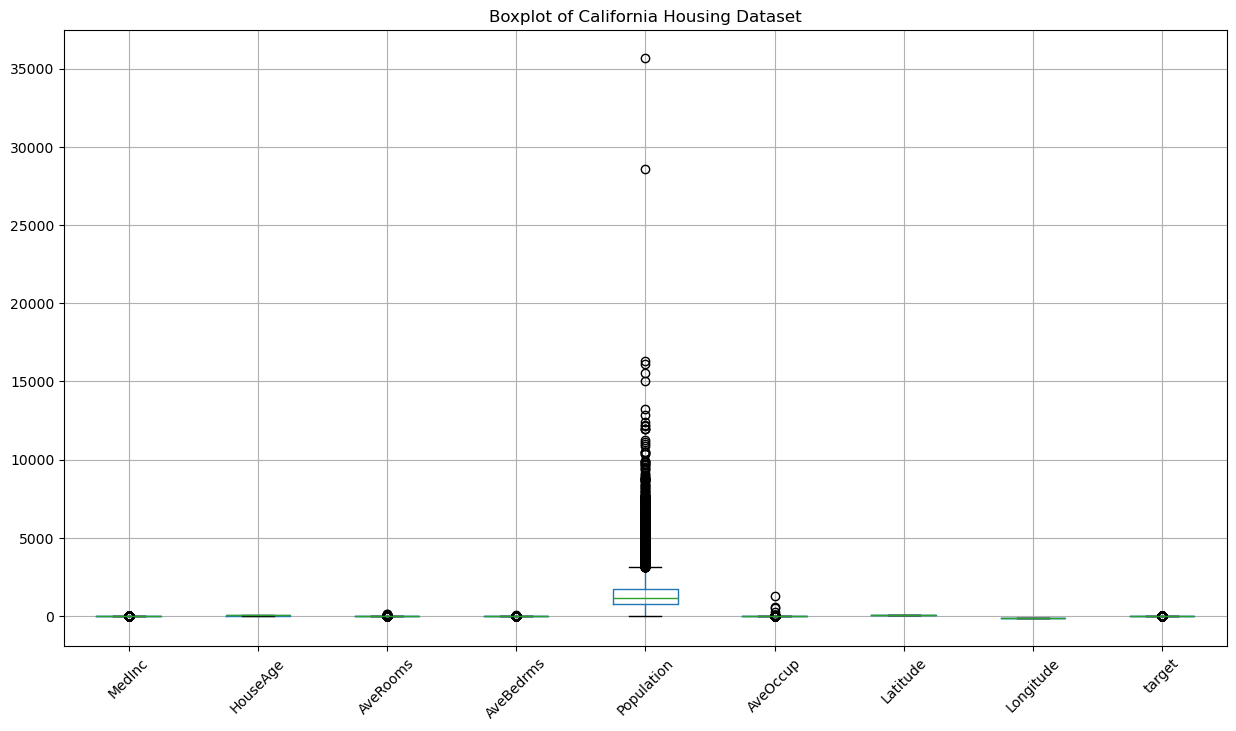

In [19]:
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of California Housing Dataset")
plt.show()

### Here outliers detected in population column, so we can use IQR method

In [21]:
df1 = df.drop("target",axis=1).columns
df1

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df[df1].quantile(0.25)
Q3 = df[df1].quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[df1] < lower_bound) | (df[df1] > upper_bound)

# Handle outliers (example: removing them)
df_after_iqr = df[~outliers.any(axis=1)]

# Print the cleaned data (or you can choose to impute outliers instead of removing them)
df_after_iqr


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


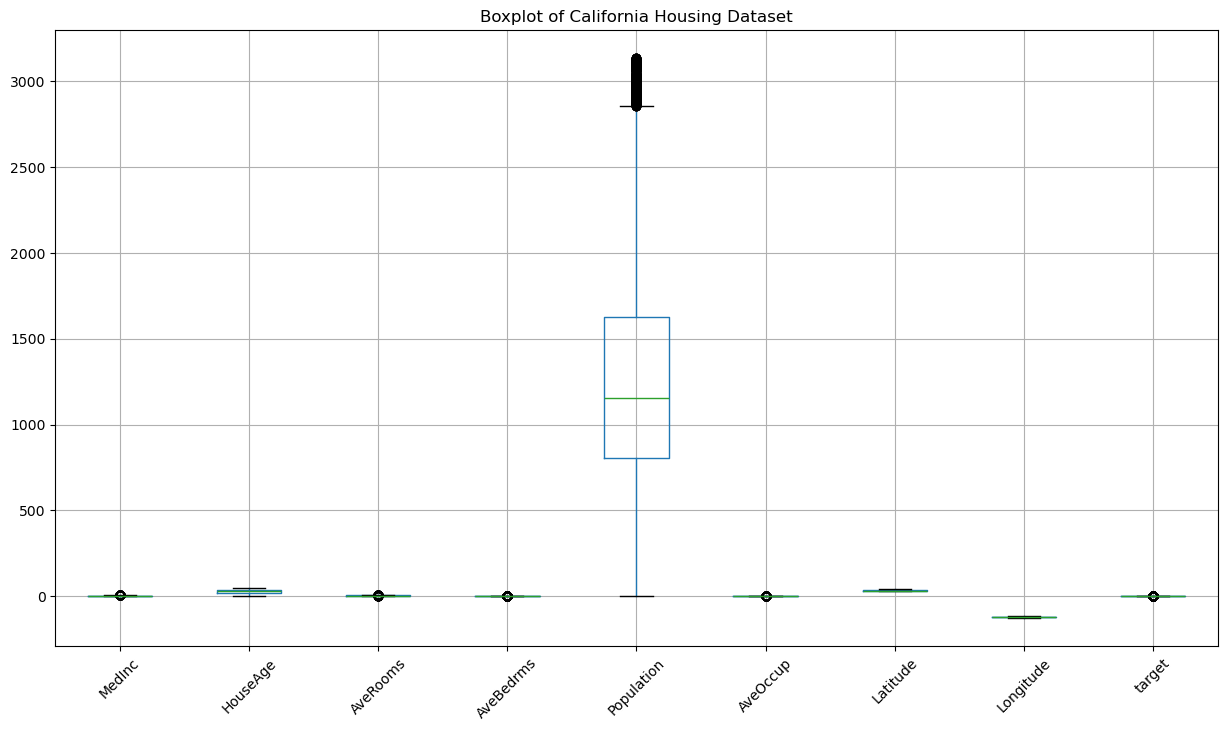

In [36]:
#boxplot of new dataset 
plt.figure(figsize=(15, 8))
df_after_iqr.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of California Housing Dataset")
plt.show()

### Dataset have no categorical columns, so encoding is not required.

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

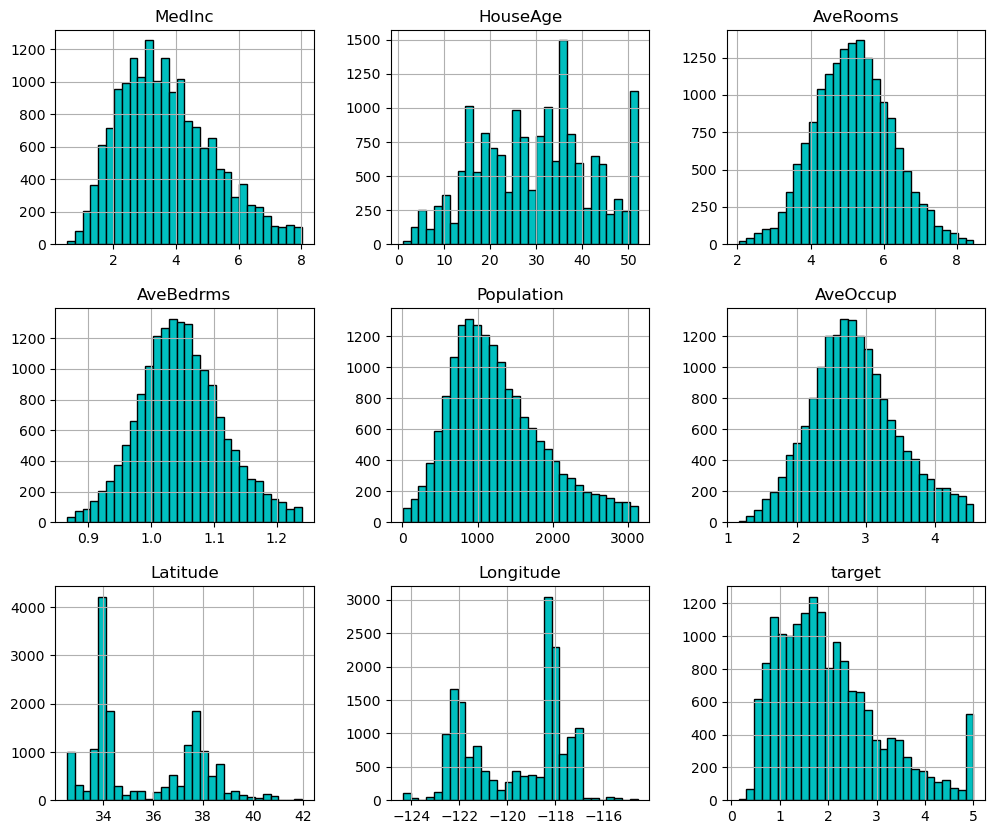

In [25]:
df_after_iqr.hist(figsize=(12, 10), bins=30, edgecolor="black",color="c")

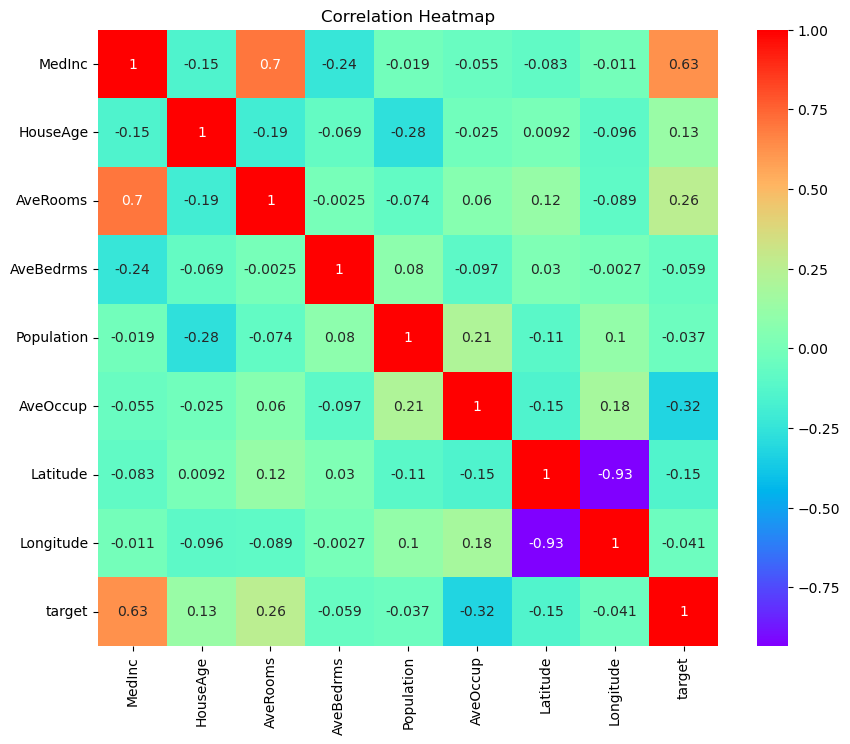

In [27]:
# correlation between columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_after_iqr.corr(), annot=True, cmap="rainbow")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
#check skewness
df_after_iqr.skew()

MedInc        0.545038
HouseAge      0.009569
AveRooms      0.113327
AveBedrms     0.242424
Population    0.731394
AveOccup      0.334693
Latitude      0.418345
Longitude    -0.275190
target        0.926549
dtype: float64

## Regression Algorithm Implementation

In [31]:
df2=df_after_iqr
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
X = df2.drop("target",axis=1)
Y = df2['target']
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
...       ...       ...       ...        ...         ...       ...       ...   
20634  3.7125      28.0  6.779070   1.148256      1041.0  3.026163     39.27   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
2        -122.24  
3

## Linear Regression

In [37]:

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#  Feature Scaling Process  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)


X_train size:  (13473, 8)
X_test size:  (3369, 8)
y_train size:  (13473,)
y_test size:  (3369,)


LinearRegression()

In [39]:
y_predict=model.predict(X_test)
y_predict

array([1.96737949, 3.10852942, 1.09816813, ..., 1.84760252, 3.03743516,
       3.44182787])

In [45]:
# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_predict
})

In [49]:
results_df

,Actual Values,Predicted Values
6815,2.13200,1.967379
14560,1.90200,3.108529
6874,1.76800,1.098168
4750,1.72700,1.743760
6273,1.51800,1.525675
...,...,...
20596,0.68500,0.938791
3641,1.81800,2.438722
16446,1.75300,1.847603
13688,1.73200,3.037435


In [55]:
# Evaluation
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')


MAE: 0.48682748558378025
MSE: 0.428136546296178
R2: 0.6246473531884873


## Decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)
# Fitting the Decision Tree Regression model to the data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)              # R2 SCORE

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')


Mean Squared Error: 0.48207709390667847
Mean Absolute Error: 0.4433684060552093
R2: 0.5773570027355329


## Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

#predictions
rf_ypred = rf_model.predict(X_test)

#evaluate model
mse = mean_squared_error(y_test, rf_ypred)   
mae = mean_absolute_error(y_test, rf_ypred)  
r2 = r2_score(y_test, rf_ypred)  


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')

Mean Squared Error: 0.2523738641553753
Mean Absolute Error: 0.33041612463639064
R2: 0.7787406874832938


## Gradient Boosting Regressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor()

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
gradient_y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, gradient_y_pred)   
mae = mean_absolute_error(y_test, gradient_y_pred) 
r2 = r2_score(y_test, gradient_y_pred)              


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')

Mean Squared Error: 0.28393981944807456
Mean Absolute Error: 0.37278591995368915
R2: 0.7510664210121198


## Support Vector Machine

In [128]:
from sklearn.svm import SVR
# Train SVM classifier
svm_regression_model = SVR()
svm_regression_model.fit(X_train, y_train)

#  predictions
svm_y_pred = svm_regression_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, gradient_y_pred)   
mae = mean_absolute_error(y_test, gradient_y_pred)  
r2 = r2_score(y_test, gradient_y_pred)              

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')

Mean Squared Error: 0.28393981944807456
Mean Absolute Error: 0.37278591995368915
R2: 0.7510664210121198


## Final result

In [138]:
models = {"Linear Regression": LinearRegression(),
           "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
           "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
           "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
           "Support Vector Regressor": SVR()
         }

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

## best performing algorithm

In [133]:
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"Best-performing model: {best_model}")

NameError: name 'results' is not defined

In [143]:
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"Best-performing model: {best_model}")

Best-performing model: Random Forest Regressor


## worst performing algorithm

In [146]:
worst_model = min(results, key=lambda x: results[x]['R2'])
print(f"Worst-performing model: {worst_model}")

Worst-performing model: Decision Tree Regressor
